<a href="https://colab.research.google.com/github/lameessa/IT326-project-depression/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT326 Project - Phase3

In this phase, we’ll use data mining techniques—classification and clustering—to analyze our dataset. Classification will categorize data into predefined labels, allowing us to predict classes for new instances, while clustering will group similar data points based on shared characteristics.

### Importing Required Libraries:

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree, metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
from sklearn.metrics import calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

### Loading Data

In [105]:
data = pd.read_csv('Processed_dataset.csv')
# Display the first few rows of the data
display(data.head())

discretized_Age  no_lasting_investmen  education_level  total_assets  \
0                1              0.735517         0.647059      0.559892   
1                0              0.291477         0.352941      0.291340   
2                1              0.301352         0.176471      0.505481   
3                1              0.291477         0.647059      0.291340   
4                0              0.291477         0.470588      0.291340   

   Married  depressed  
0        1          1  
1        0          1  
2        1          1  
3        1          1  
4        1          1

# Classification

We will perform a comprehensive evaluation of Decision Tree classification on our dataset, using three distinct training-test partition sizes. This approach ensures a robust assessment of the model's reliability and generalizability, supporting confident decision-making for model selection.


### Feature Selection

We used feature selection to focus on the most relevant attributes for predicting "depressed" status. This reduces noise and improves model accuracy and efficiency by highlighting the features that most influence whether a person is classified as depressed or not.

In [106]:
fn = data.keys().tolist() [:-1]
X = data[fn]
y = data['depressed']

### Splitting data

Splitting data into three different test sizes:

60-40:
  - Training (60%)

  - Test (40%)
  
70-30:
  - Training (70%)

  - Test (30%)

80-20:
  - Training (80%)

  - Test (20%)


In [107]:
# 60% training and 40% testing
X_train_60, X_test_40, Y_train_60, Y_test_40 = train_test_split(X, y, test_size=0.4, random_state=1)

# 70% training and 30% testing
X_train_70, X_test_30, Y_train_70, Y_test_30 = train_test_split(X, y, test_size=0.3, random_state=1)

# 80% training and 20% testing
X_train_80, X_test_20, Y_train_80, Y_test_20 = train_test_split(X, y, test_size=0.2, random_state=1)

### Building desicion tree model:

For each partition, we will test two attribute selection measures: Information Gain (using entropy) and the Gini index.

The Gini index, ranging from 0 to 1, measures impurity, with 0 indicating perfect purity (where all data points are of the same class) and 1 representing maximum impurity (equal class distribution). Decision trees use the attribute with the lowest Gini index after a split for branching.

To manage complexity, we will prune the decision trees by setting a maximum depth. This pruning reduces unnecessary branches, simplifying decision boundaries and enhancing interpretability without greatly affecting predictive performance.

#### Information Gain (Entropy)

Entropy is used when building desicion tree models to decide the best splits for our data. In each step, entropy helps measure the impurity of a feature regarding the "depressed" attribute, guiding the model to choose the splits that provide the most information gain. This process helps create a more accurate and efficient tree by focusing on features that best separate depressed and non-depressed cases.

In [108]:
clf_entropy_60 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_entropy_60.fit(X_train_60, Y_train_60)

clf_entropy_70 = DecisionTreeClassifier()
clf_entropy_70.fit(X_train_70, Y_train_70)

clf_entropy_80 = DecisionTreeClassifier()
clf_entropy_80.fit(X_train_80, Y_train_80)

y_pred_entropy_60 = clf_entropy_60.predict(X_test_40)
y_pred_entropy_70 = clf_entropy_70.predict(X_test_30)
y_pred_entropy_80 = clf_entropy_80.predict(X_test_20)

##### Evaluating The Model:

The outputs show the model's accuracy with entropy: 60.7% for 60-40, 56.6% for 70-30, and 54.7% for 80-20. The highest accuracy is with the 60-40 split, but overall accuracy is moderate, indicating room for improvement in predicting the "depressed" attribute.

In [109]:
accuracy_entropy_60 = metrics.accuracy_score(Y_test_40, y_pred_entropy_60)
print("Accuracy (Entropy - 60-40):", accuracy_entropy_60)

accuracy_entropy_70 = metrics.accuracy_score(Y_test_30, y_pred_entropy_70)
print("Accuracy (Entropy - 70-30):", accuracy_entropy_70)

accuracy_entropy_80 = metrics.accuracy_score(Y_test_20, y_pred_entropy_80)
print("Accuracy (Entropy - 80-20):", accuracy_entropy_80)

Accuracy (Entropy - 60-40): 0.6066350710900474
Accuracy (Entropy - 70-30): 0.5786163522012578
Accuracy (Entropy - 80-20): 0.5283018867924528


#####Entropy Confusion Matrix

Based on the confusion matrices, the 60-40 split shows the highest accuracy at approximately 60.65%, with fewer misclassifications than the other splits. It has balanced performance between true positives (36) and true negatives (92), though there are still some false positives (36) and false negatives (47). The 70-30 split has a slightly lower accuracy of around 56.64%, and the 80-20 split has the lowest at about 54.7%. Therefore, the 60-40 split provides the best results among the three, suggesting it may be the most suitable test size for this model.

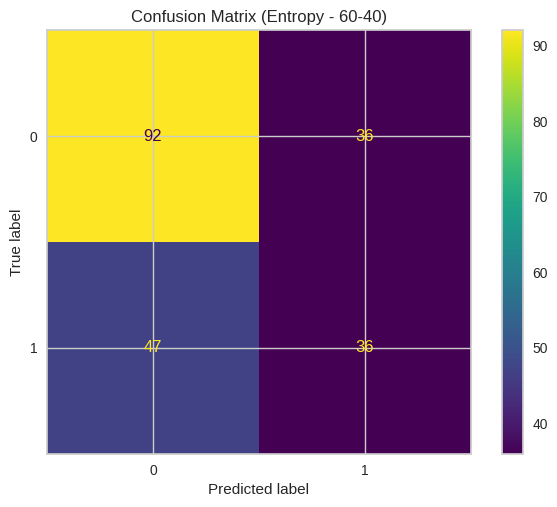

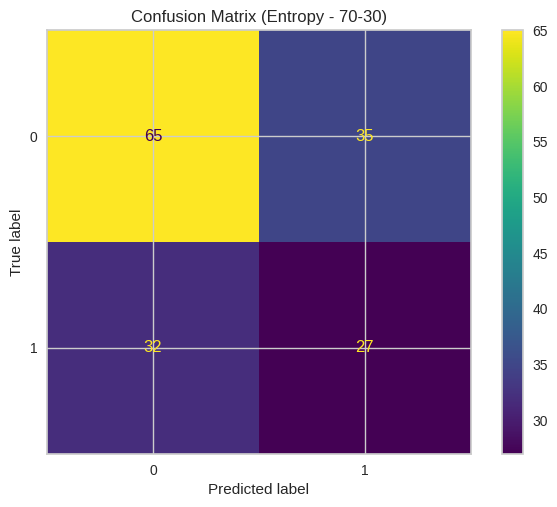

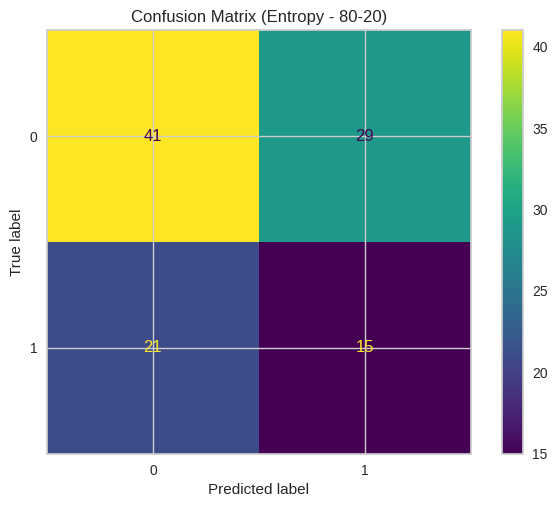

In [110]:
ConfusionMatrixDisplay.from_predictions(Y_test_40, y_pred_entropy_60)
plt.title("Confusion Matrix (Entropy - 60-40)")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test_30, y_pred_entropy_70)
plt.title("Confusion Matrix (Entropy - 70-30)")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test_20, y_pred_entropy_80)
plt.title("Confusion Matrix (Entropy - 80-20)")
plt.show()

##### Visualizing and Saving Decision Tree

The decision tree visuals show how the model’s structure changes across the 60-40, 70-30, and 80-20 splits when using Entropy. Each tree uses different paths and features to classify "depressed" and "not depressed" cases, which affects the model's accuracy. The 60-40 split provides the best accuracy, showing that it might be the most effective structure for this data. These trees help identify key features and how the model makes decisions in each split.

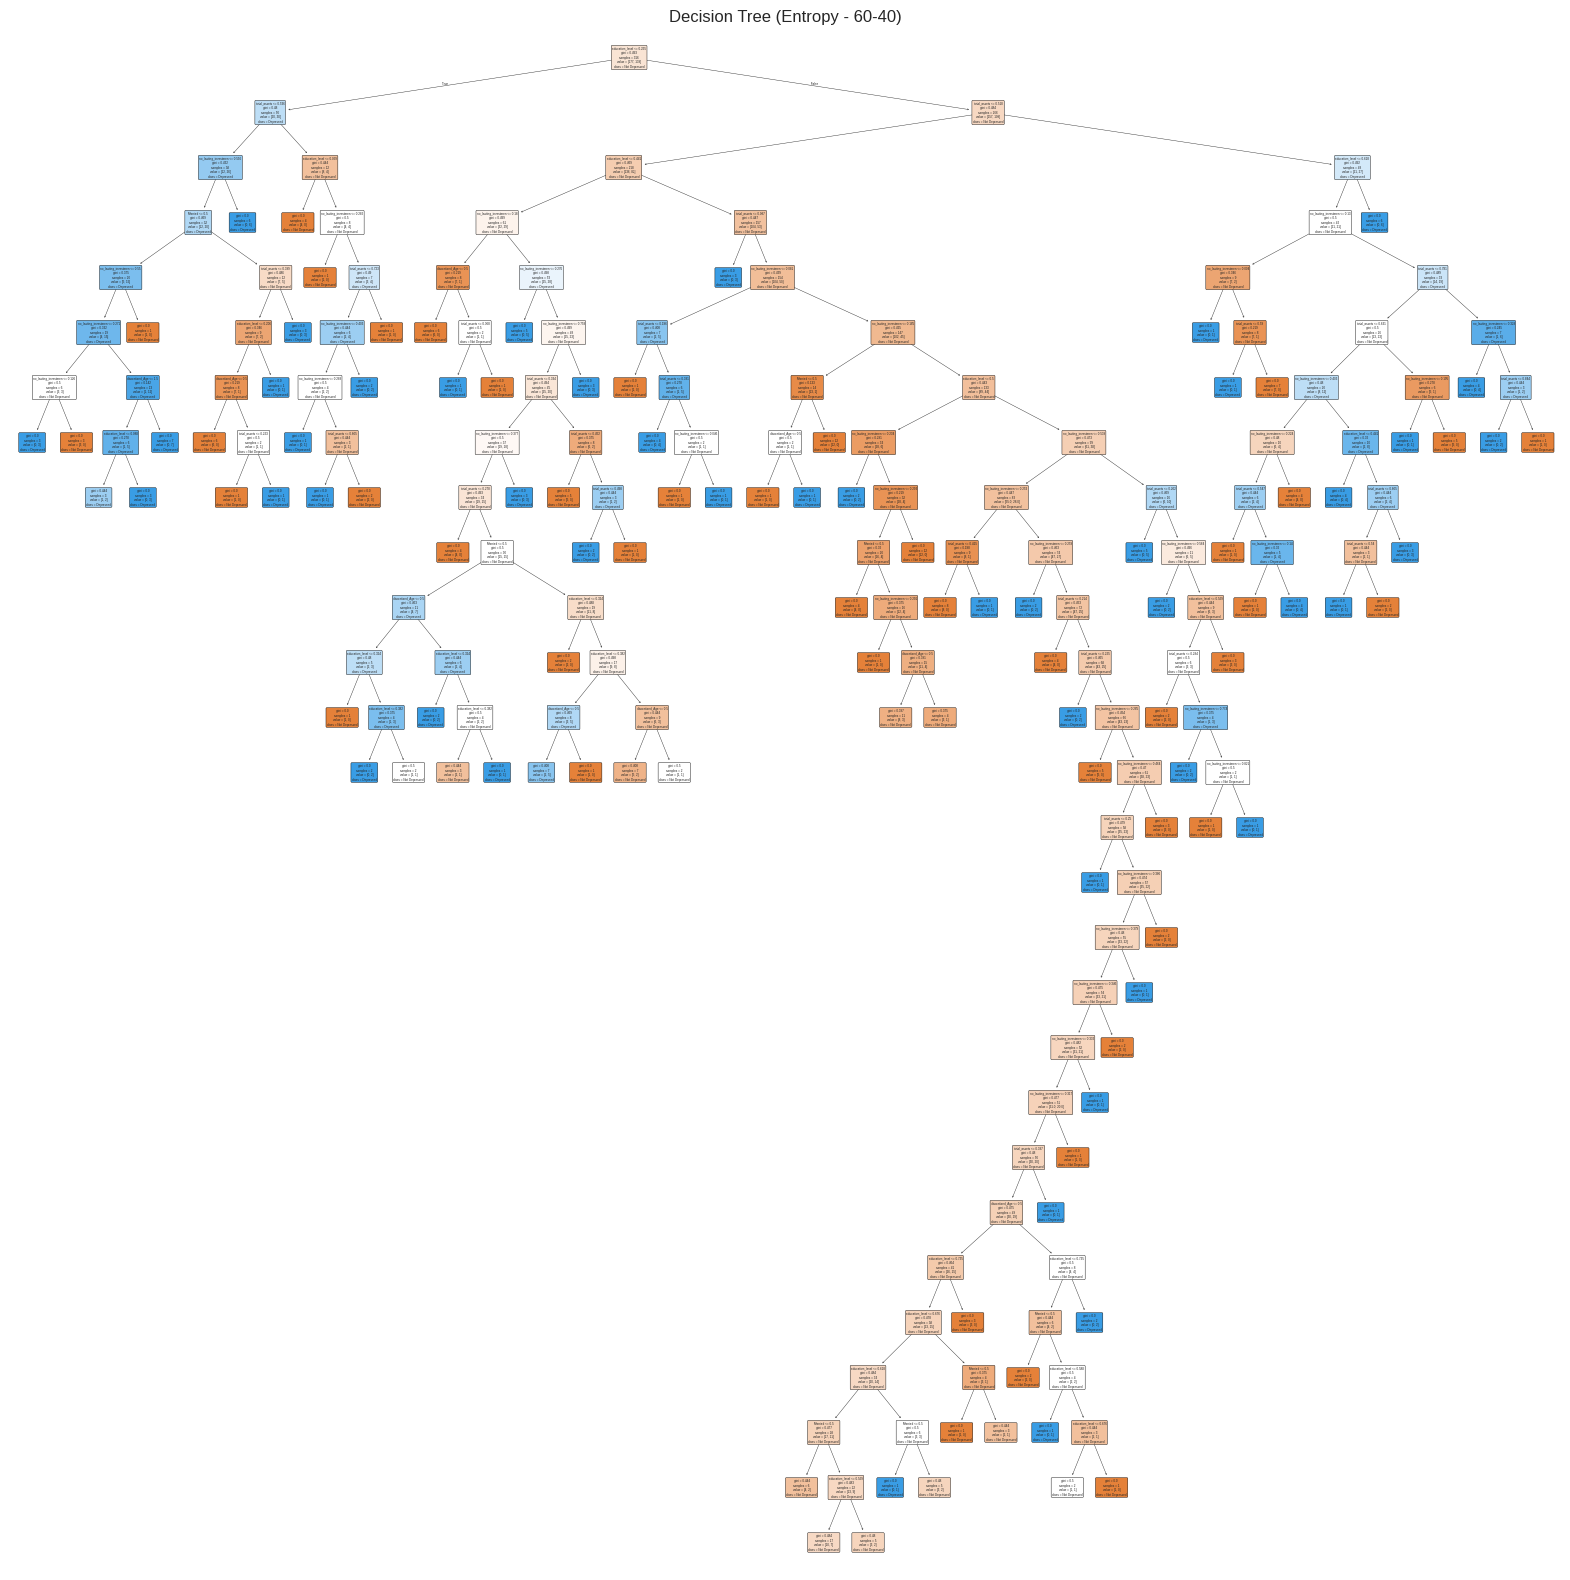

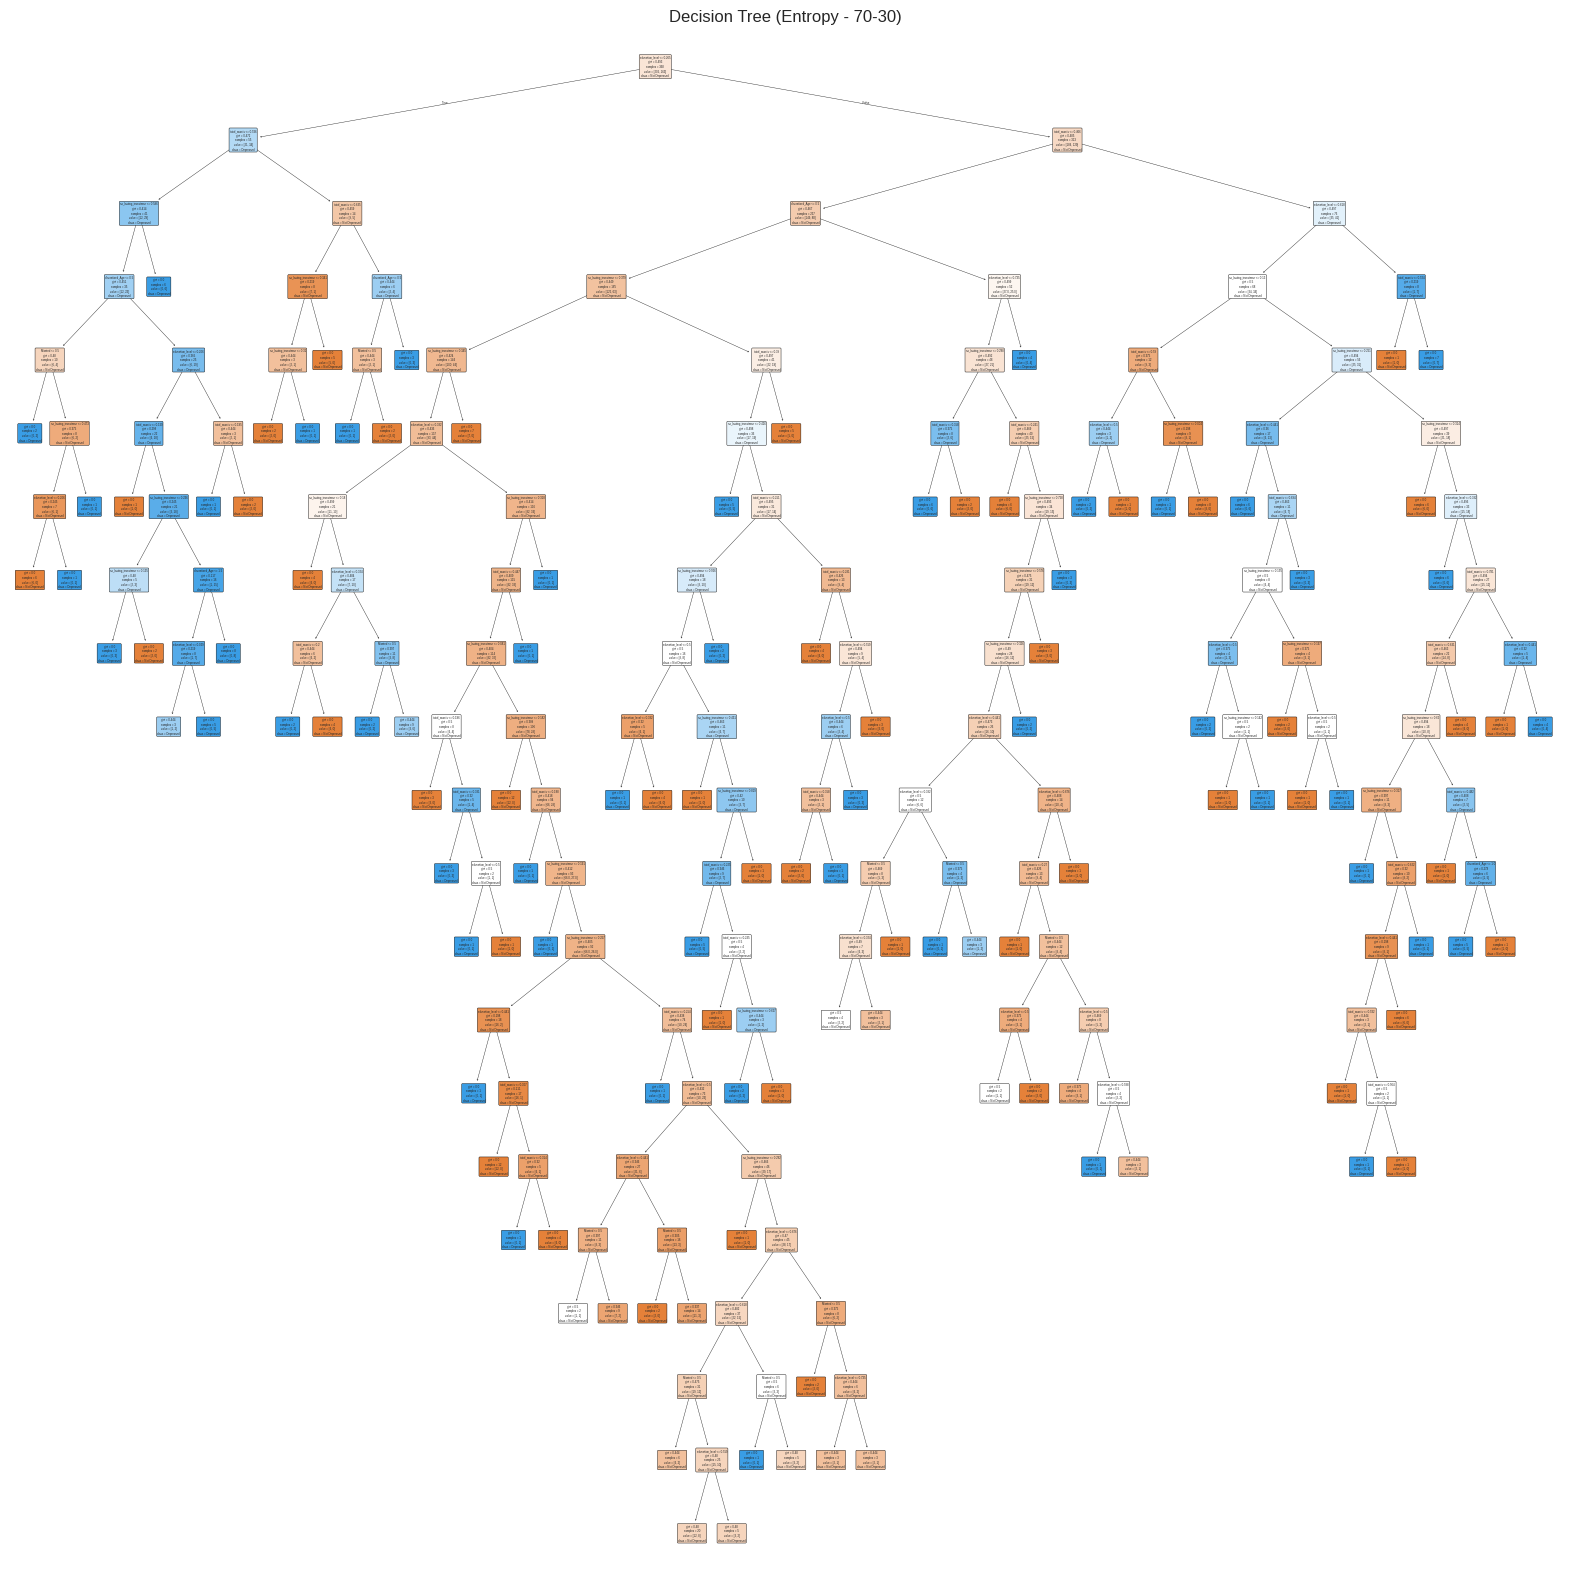

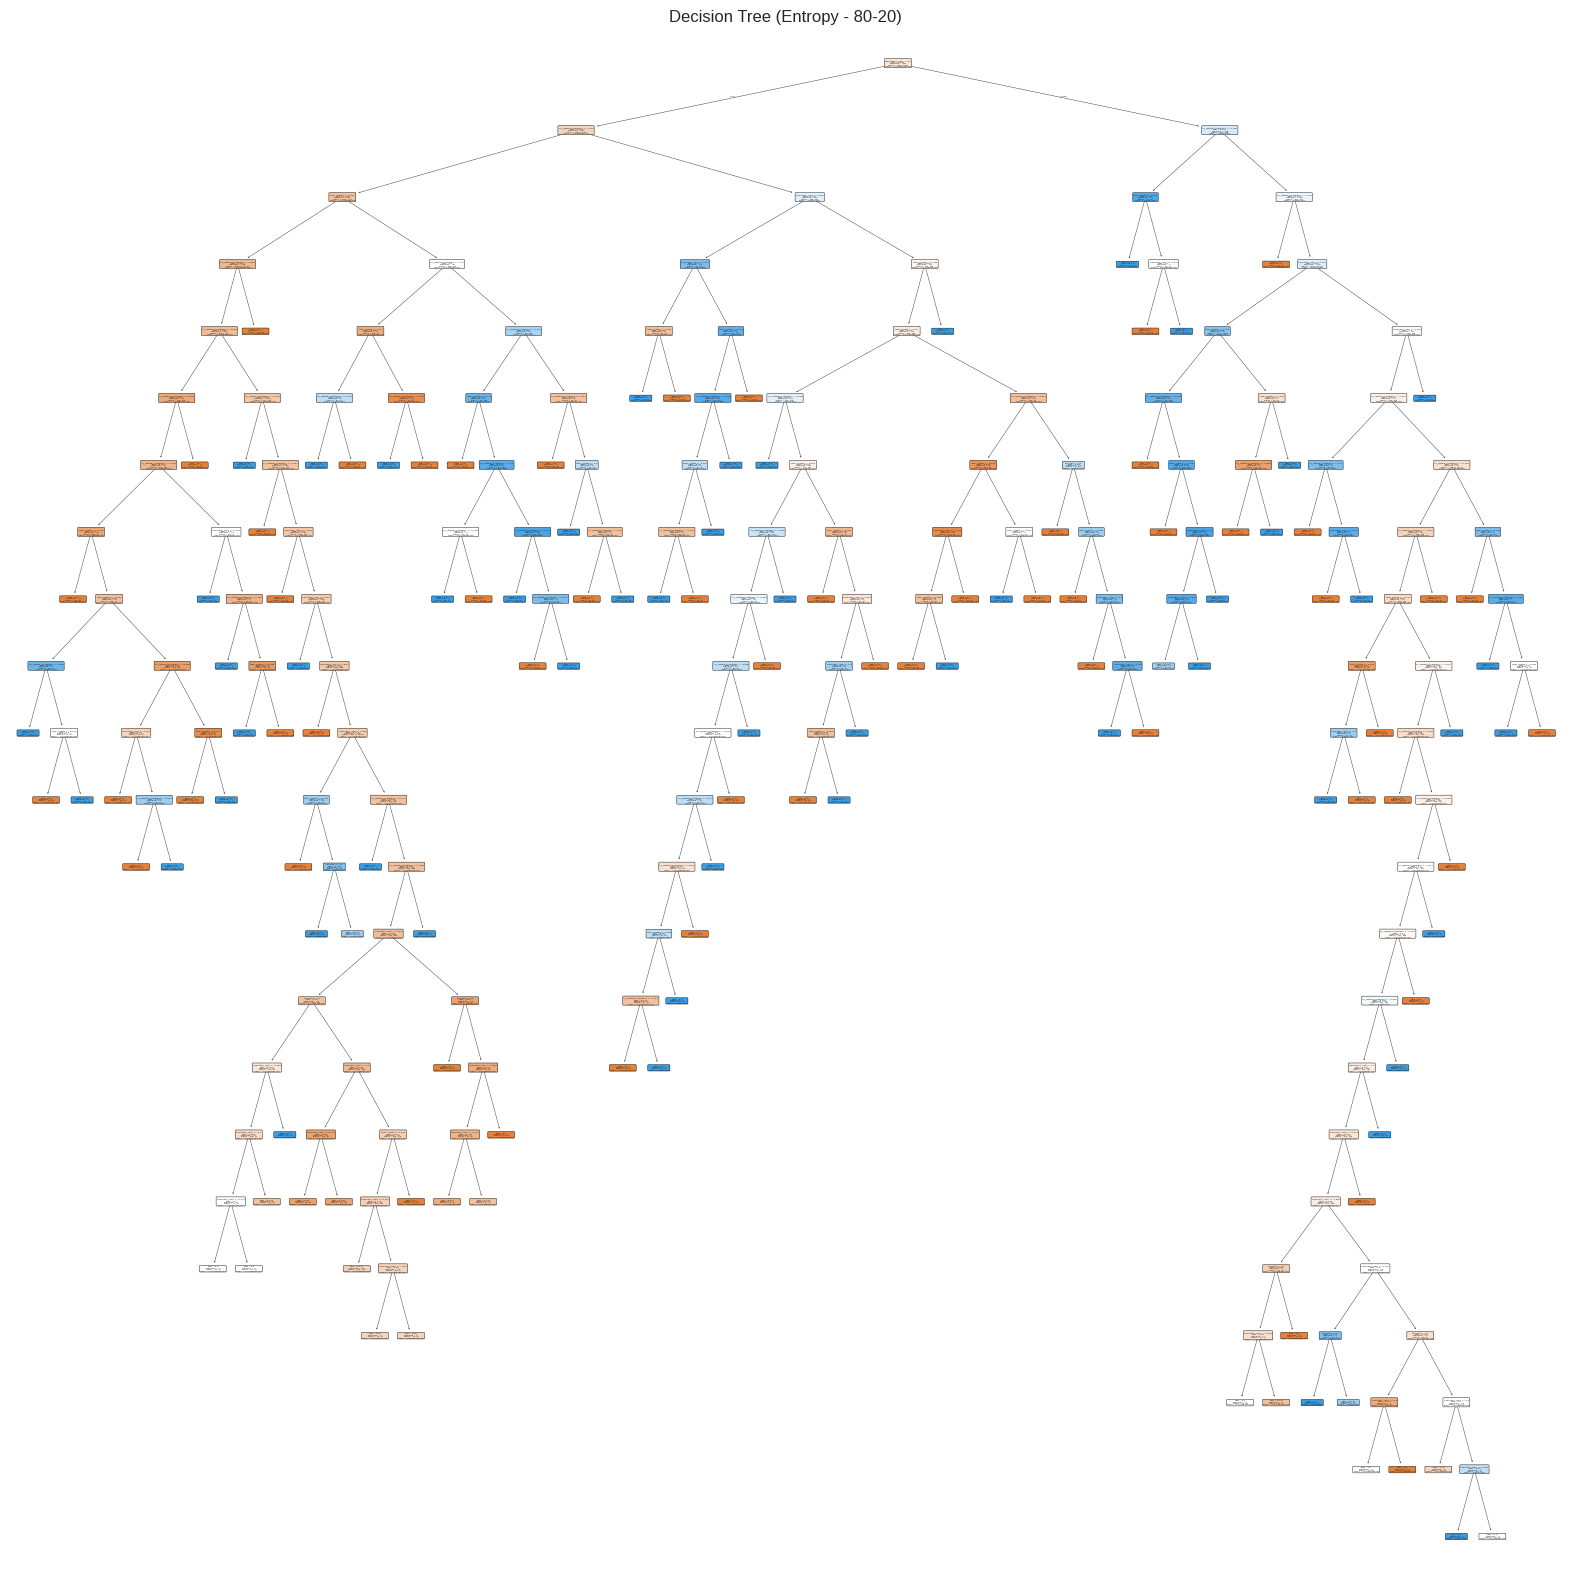

In [111]:
plt.figure(figsize=(20, 20))
plot_tree(clf_entropy_60, filled=True, feature_names=X.columns, class_names=['Not Depressed', 'Depressed'], rounded=True)
plt.title("Decision Tree (Entropy - 60-40)")
plt.show()

plt.figure(figsize=(20, 20))
plot_tree(clf_entropy_70, filled=True, feature_names=X.columns, class_names=['Not Depressed', 'Depressed'], rounded=True)
plt.title("Decision Tree (Entropy - 70-30)")
plt.show()

plt.figure(figsize=(20, 20))
plot_tree(clf_entropy_80, filled=True, feature_names=X.columns, class_names=['Not Depressed', 'Depressed'], rounded=True)
plt.title("Decision Tree (Entropy - 80-20)")
plt.show()

####**Gini**

The Gini index is used when building decision tree models to decide the best splits for the data. At each step, the Gini index measures the impurity of a feature in relation to the "depressed" attribute, guiding the model to choose splits that reduce impurity the most. This process helps create a more accurate and efficient tree by focusing on features that best distinguish between depressed and non-depressed cases.

In [112]:
clf_gini_60 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini_60.fit(X_train_60, Y_train_60)

clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini_70.fit(X_train_70, Y_train_70)

clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=1)
clf_gini_80.fit(X_train_80, Y_train_80)

y_pred_gini_60 = clf_gini_60.predict(X_test_40)
y_pred_gini_70 = clf_gini_70.predict(X_test_30)
y_pred_gini_80 = clf_gini_80.predict(X_test_20)

##### Evaluating the model



The outputs show the model's accuracy using the Gini index: 60.7% for the 60-40 split, 53.5% for the 70-30 split, and 53.8% for the 80-20 split. The highest accuracy is achieved with the 60-40 split, but overall accuracy remains moderate, suggesting room for improvement in predicting the "depressed" attribute.

In [113]:
accuracy_gini_60 = metrics.accuracy_score(Y_test_40, y_pred_gini_60)
print("Accuracy (Gini - 60-40):", accuracy_gini_60)

accuracy_gini_70 = metrics.accuracy_score(Y_test_30, y_pred_gini_70)
print("Accuracy (Gini - 70-30):", accuracy_gini_70)

accuracy_gini_80 = metrics.accuracy_score(Y_test_20, y_pred_gini_80)
print("Accuracy (Gini - 80-20):", accuracy_gini_80)

Accuracy (Gini - 60-40): 0.6066350710900474
Accuracy (Gini - 70-30): 0.5345911949685535
Accuracy (Gini - 80-20): 0.5377358490566038


##### Gini confusion matrix

Based on the confusion matrices, the 60-40 split shows the highest accuracy at approximately 60.65%, with fewer misclassifications than the other splits. It has balanced performance between true positives (36) and true negatives (92), though there are still some false positives (36) and false negatives (47). The 70-30 split has a slightly lower accuracy of around 53.49%, and the 80-20 split has the lowest at about 53.77%. Therefore, the 60-40 split provides the best results among the three, suggesting it may be the most suitable test size for this model.

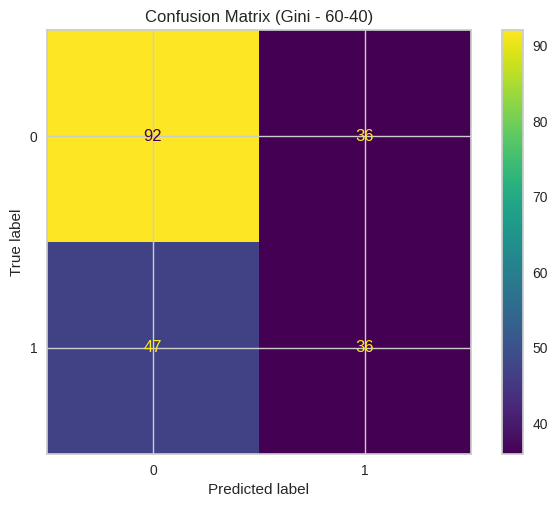

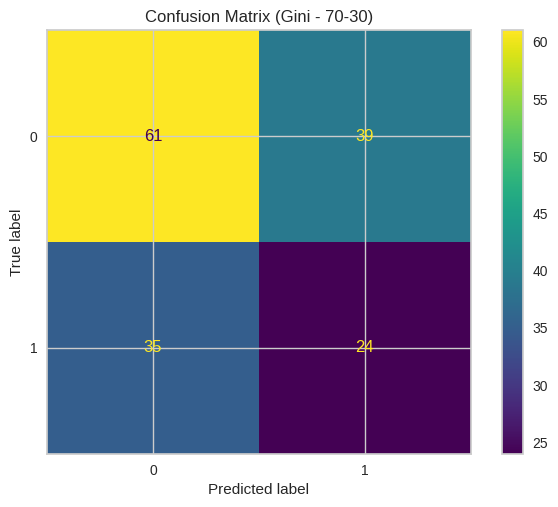

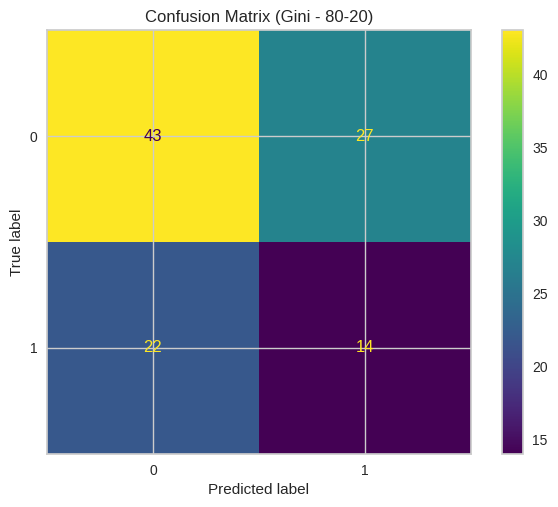

In [114]:
ConfusionMatrixDisplay.from_predictions(Y_test_40, y_pred_gini_60)
plt.title("Confusion Matrix (Gini - 60-40)")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test_30, y_pred_gini_70)
plt.title("Confusion Matrix (Gini - 70-30)")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test_20, y_pred_gini_80)
plt.title("Confusion Matrix (Gini - 80-20)")
plt.show()

##### visualising and saving the decision tree



The decision tree visuals illustrate how the model’s structure varies across the 60-40, 70-30, and 80-20 splits when using the Gini index. Each tree takes different paths and uses various features to classify "depressed" and "not depressed" cases, influencing the model's accuracy. The 60-40 split provides the best accuracy with this criterion, suggesting it may be the most effective structure for this data. These trees help identify important features and show how the model makes decisions in each split using the Gini index.

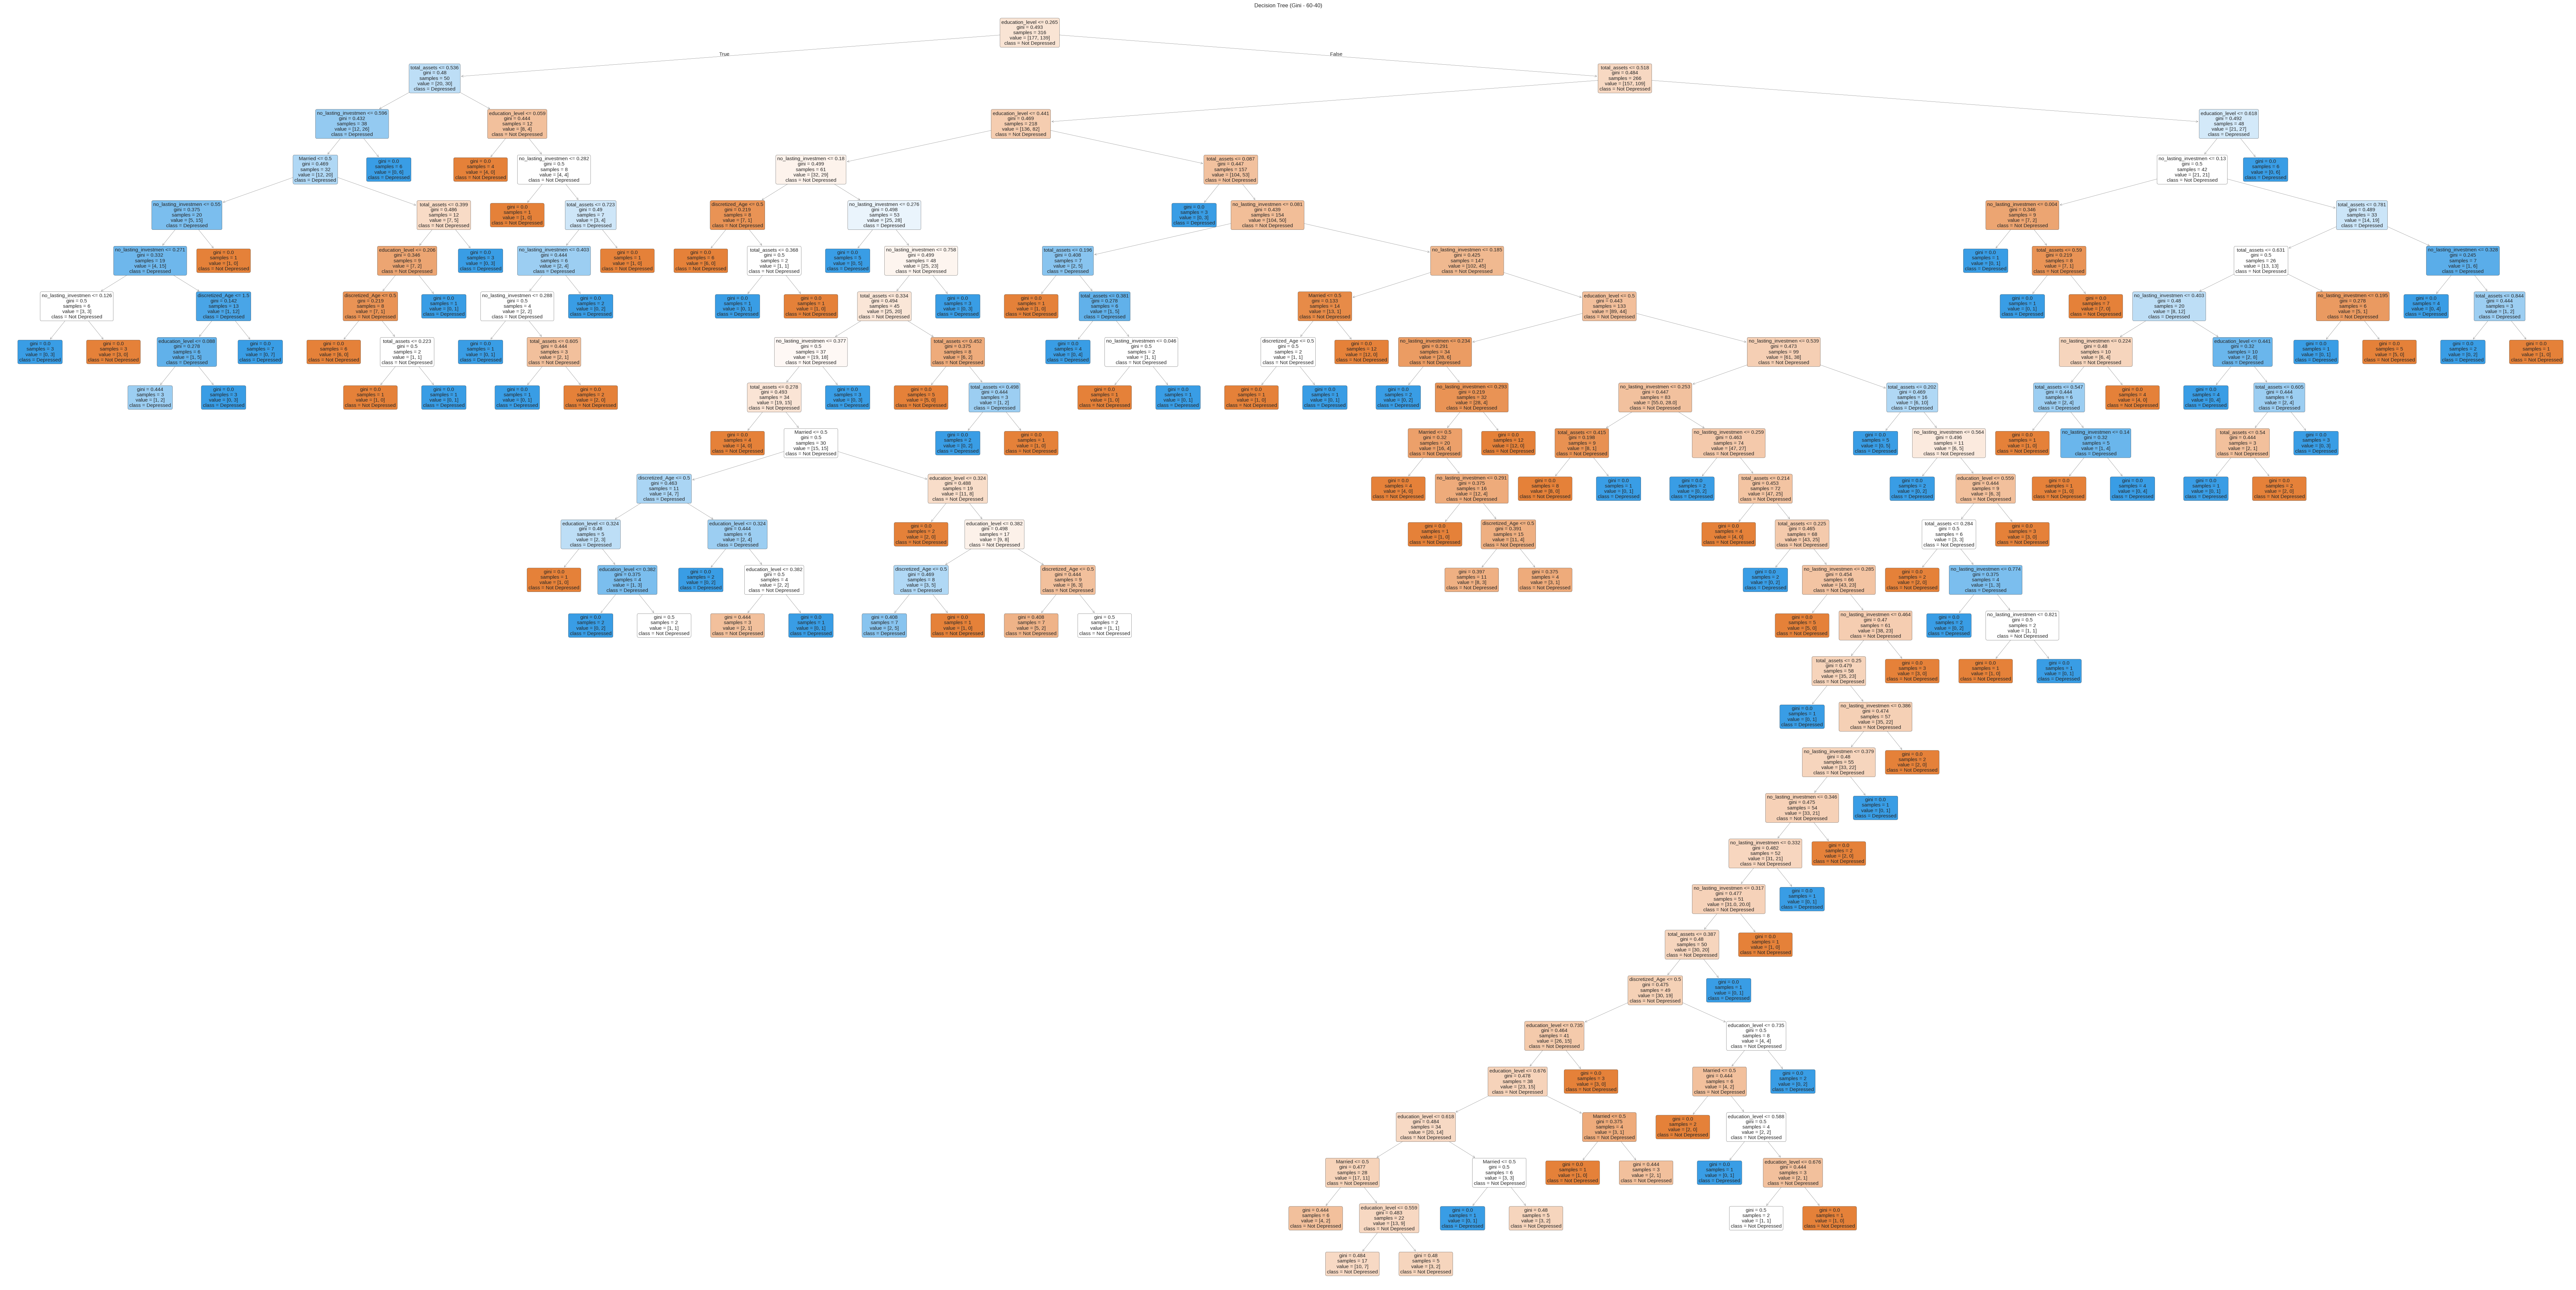

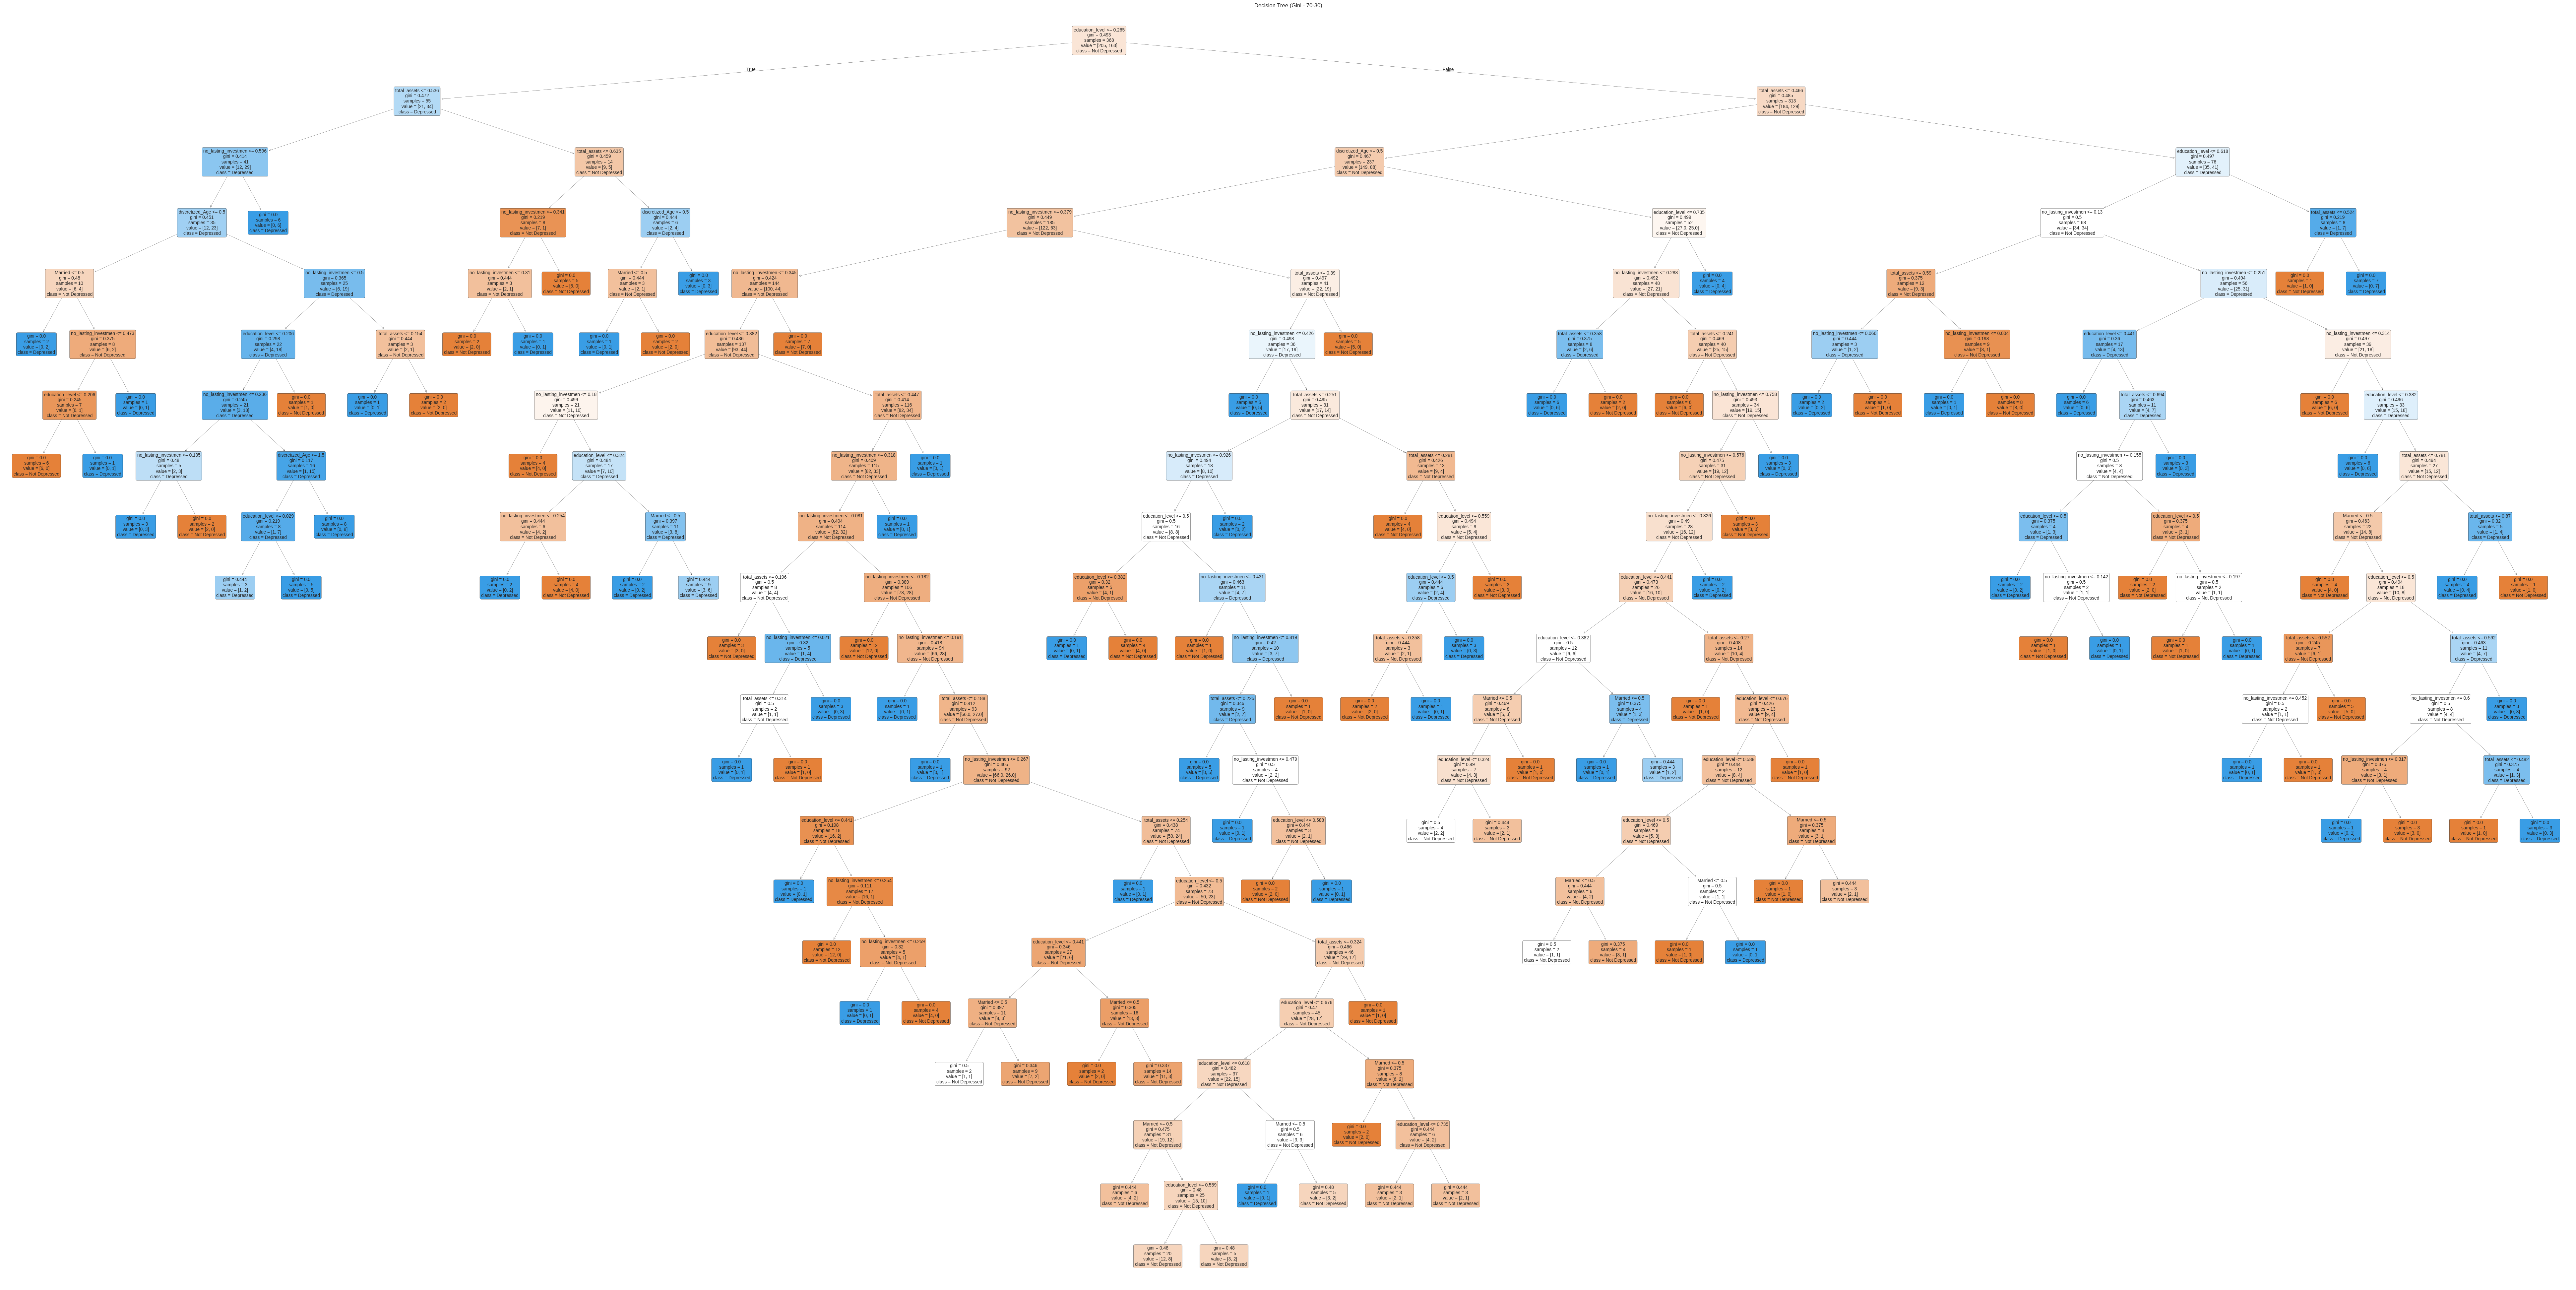

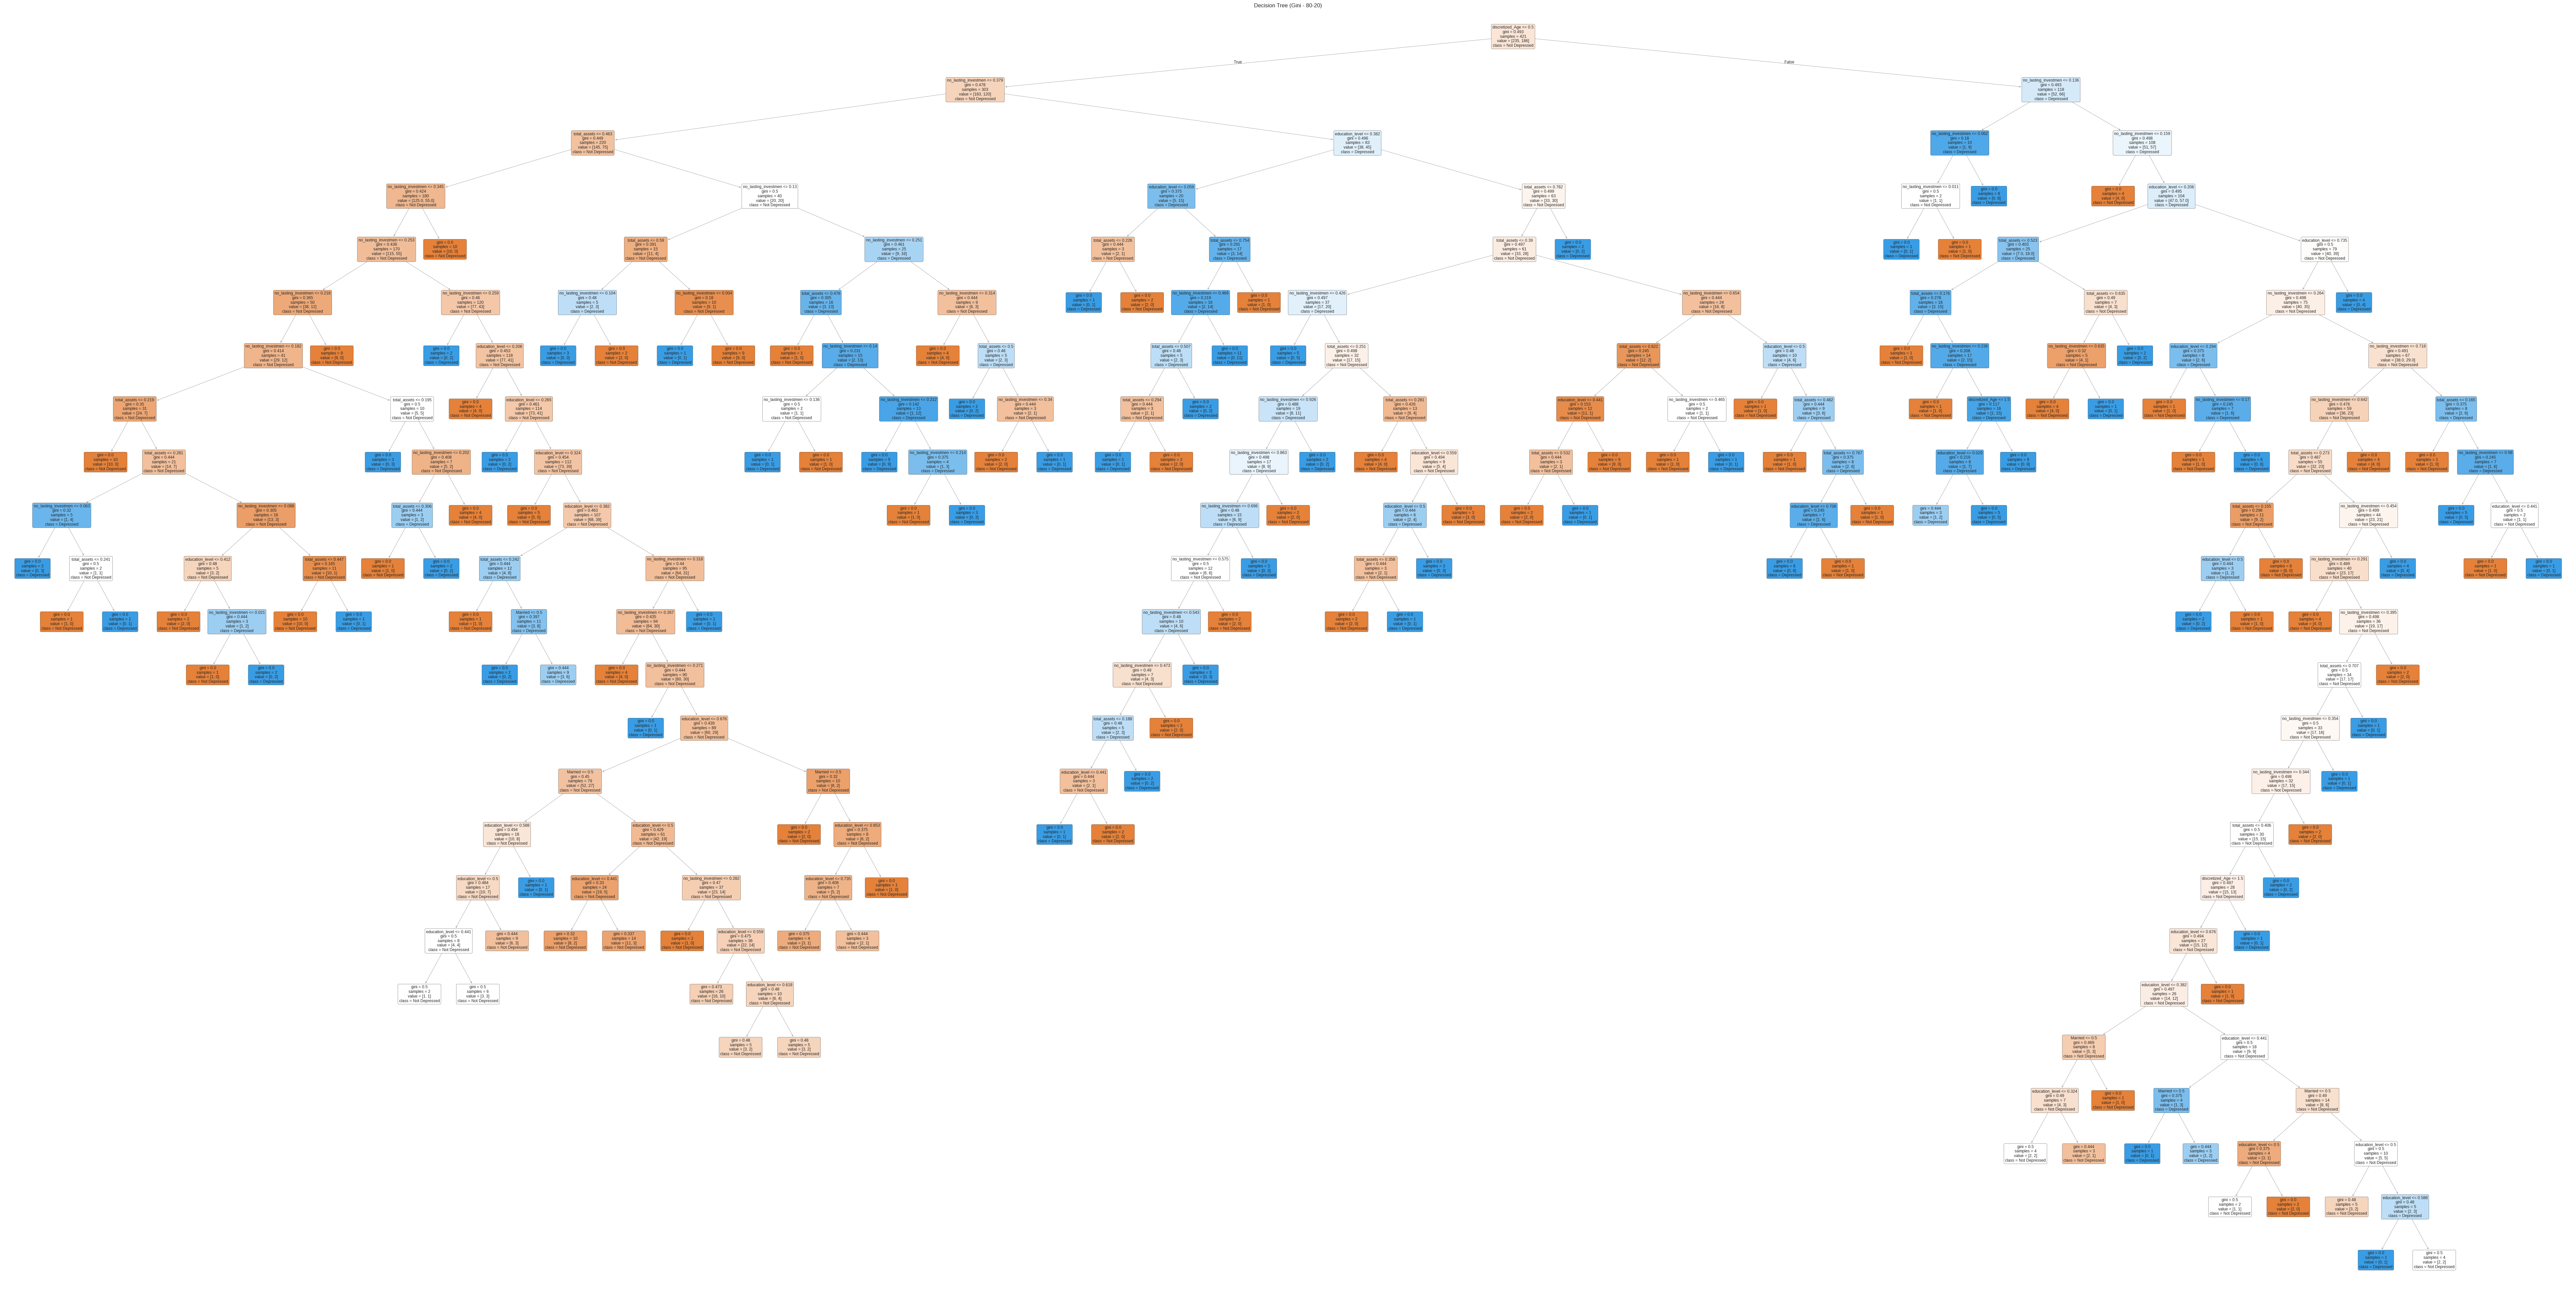

In [115]:
plt.figure(figsize=(100, 50))
plot_tree(clf_gini_60, filled=True, feature_names=X.columns, class_names=['Not Depressed', 'Depressed'], rounded=True)
plt.title("Decision Tree (Gini - 60-40)")
plt.show()

plt.figure(figsize=(100, 50))
plot_tree(clf_gini_70, filled=True, feature_names=X.columns, class_names=['Not Depressed', 'Depressed'], rounded=True)
plt.title("Decision Tree (Gini - 70-30)")
plt.show()

plt.figure(figsize=(100, 50))
plot_tree(clf_gini_80, filled=True, feature_names=X.columns, class_names=['Not Depressed', 'Depressed'], rounded=True)
plt.title("Decision Tree (Gini - 80-20)")
plt.show()

### Results:

Comparing the results between the three train-test splits (60-40, 70-30, and 80-20) using both entropy and the Gini index:

- **60-40 split**:
  - **Entropy**: Accuracy is approximately 60.65%, with balanced performance between true positives and true negatives, but still some misclassifications in false positives and false negatives.
  - **Gini**: Accuracy is around 60.65%, with a similar level of misclassification as entropy. Both criteria perform equally well with this split.

- **70-30 split**:
  - **Entropy**: Accuracy is about 56.64%, which is lower than the 60-40 split and indicates a relatively high rate of misclassifications.
  - **Gini**: Accuracy is approximately 53.49%, which is slightly lower than entropy for this split, showing that the model struggles more with this split size.

- **80-20 split**:
  - **Entropy**: Accuracy is approximately 54.7%, the lowest among all entropy-based splits. This split has fewer misclassifications than the 70-30 split but is still less effective than the 60-40 split.
  - **Gini**: Accuracy is around 53.77%, which is slightly lower than entropy but comparable in performance for this split.

For both entropy and Gini, the **60-40 split yields the highest accuracy** at approximately 60.65%, suggesting it is the most suitable split size for this model. There is minimal difference between the accuracy of entropy and Gini within each split, indicating similar effectiveness for both criteria on this dataset. However, the 60-40 split consistently provides the best performance, making it the preferred choice for this model.

# Clustring

###Cluster Validation Using KMeans

KMeans is a clustering algorithm that groups data points into k clusters based on feature similarity. It assigns points to the nearest cluster center, then recalculates centers until clusters stabilize, helping to reveal patterns in the data.

The target column "depressed" (class label) was dropped for clustering. This allows the KMeans algorithm to group data based on feature similarities alone, without using predefined labels, enabling unbiased clustering.

In [116]:
target_column = data.columns[-1]
print(target_column)
# Drop the target column
data_features = data.drop(target_column, axis=1)

depressed


### Scaling

Scaling is important for clustering because features may have different ranges, which can distort distance calculations in algorithms like KMeans. By scaling the data, each feature contributes equally to the clustering process, resulting in more accurate and balanced clusters.

In [117]:
# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_features)

# Create a new DataFrame with the scaled features
depression_scaled = pd.DataFrame(scaled_features, columns=data_features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
display(depression_scaled.head())


Scaled DataFrame:


discretized_Age  no_lasting_investmen  education_level  total_assets  \
0         1.166099              1.814734         1.146462      1.088977   
1        -0.564983             -0.265261        -0.495346     -0.408907   
2         1.166099             -0.219004        -1.480432      0.785491   
3         1.166099             -0.265261         1.146462     -0.408907   
4        -0.564983             -0.265261         0.161377     -0.408907   

    Married  
0  0.583924  
1 -1.712552  
2  0.583924  
3  0.583924  
4  0.583924

###K-means Algorithm

The KMeans algorithm identified clusters with distinct centers, representing average feature values for each group. By testing different values of \( k \), we gained insights into natural groupings within the data:

- **\( k = 4 \)**: Broadly segments the dataset into four main groups.
- **\( k = 5 \)**: Adds more detail, identifying five distinct subgroups.
- **\( k = 6 \)**: Provides finer segmentation, capturing subtle variations.

These clusters reveal patterns related to the "depressed" attribute, helping to identify segments with shared characteristics.

#### Clustering Visualisation (K=4)

With \( k = 4 \), the KMeans algorithm created four clusters with distinct centers, grouping data points based on similar characteristics. The average silhouette score is 0.379, indicating moderate separation between clusters. The silhouette plot shows that most data points fit reasonably well into their clusters, though some overlap still exists between certain groups. This clustering provides a balanced segmentation of the data.

Cluster Centers:
[[-3.61326382e-01 -1.67173259e-01  3.11071330e-01  1.84047673e+00
   2.46206647e-01 -6.66133815e-16]
 [-3.32623091e-01 -3.66195752e-01  2.64954200e-01 -4.55493399e-01
   2.37140416e-01  1.00000000e+00]
 [ 1.58925212e+00 -1.52407039e-01 -1.15206987e+00  1.23678180e-01
  -1.32980640e+00  2.00000000e+00]
 [-2.72405856e-01  1.89029224e+00  5.03815013e-02 -7.69607296e-03
   4.54544790e-01  3.00000000e+00]]

Cluster Labels:
[3 1 2 1 1 0 2 3 1 1 1 1 2 1 1 1 0 2 0 3 1 2 0 0 2 1 1 2 3 2 1 0 1 2 3 1 1
 2 1 1 2 1 2 0 0 1 1 0 3 1 1 1 0 1 3 2 3 1 1 0 2 1 2 2 3 1 1 1 1 3 2 0 2 3
 1 1 0 0 3 1 1 1 1 1 2 2 3 0 2 2 1 2 3 3 3 1 1 1 1 0 1 1 1 1 2 1 3 2 3 2 1
 1 0 3 1 3 1 1 1 2 1 1 0 0 3 0 2 2 3 1 1 1 2 1 1 3 1 2 3 2 1 2 1 1 2 2 0 1
 0 2 1 3 1 1 1 3 2 1 0 1 0 1 3 2 0 2 3 2 1 1 1 1 2 1 3 0 2 1 1 1 1 2 1 3 3
 1 2 3 1 0 0 1 1 2 3 1 1 0 1 1 1 3 3 1 0 1 2 2 1 2 2 0 3 1 0 1 1 1 1 2 1 2
 1 1 1 2 1 1 2 0 2 0 1 1 2 1 0 1 1 1 1 1 2 1 3 1 1 0 1 1 1 2 1 2 1 0 1 2 1
 1 1 2 2 3 1 1 2 3 1 1 1 1 1 1 1 1 1

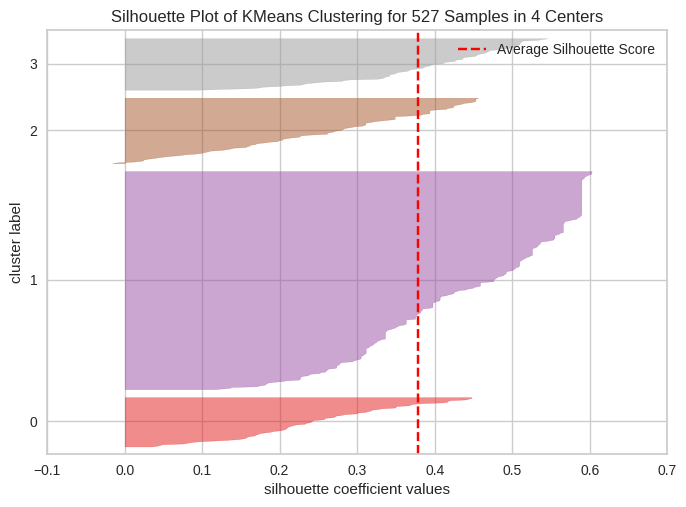

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 527 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [129]:
np.random.seed(42)
# Run k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans. fit (depression_scaled)
# Print the clustering result
print("Cluster Centers:")
print (kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result. labels_)

warnings.filterwarnings("ignore")
#kmeans = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer (kmeans, color="YellowBrick" )
visualizer.fit(depression_scaled) # Fit the data to the visualizer
print("The average silhouette score is:", visualizer.silhouette_score_) # Print the average visualizer.show() # Finalize and render the figure
visualizer.show()

#### Clustering Visualisation (K=5)

The KMeans algorithm with \( k = 5 \) created five clusters, each with distinct centers, grouping data points based on similar characteristics. The average silhouette score of 0.345 indicates moderate separation between clusters, though there is some overlap. The silhouette plot shows that most clusters have positive silhouette scores, suggesting good cohesion within clusters, but some data points near zero or negative values indicate potential overlap between certain clusters.

Cluster Centers:
[[-0.25493856 -0.22704631  0.26429636  1.87983283  0.34399338]
 [-0.3118209  -0.37670019  0.24833446 -0.44385567  0.58392373]
 [ 2.10088298 -0.01404313 -1.8613312   0.14684498 -1.02360958]
 [-0.2807756   1.94456948  0.07316043 -0.09179055  0.5153722 ]
 [ 0.10821543 -0.21185274  0.08475928 -0.16495107 -1.71255243]]

Cluster Labels:
[3 4 2 1 1 0 4 3 1 4 1 1 2 1 1 1 0 4 0 3 4 2 0 0 0 1 1 2 3 4 4 0 1 4 1 1 1
 2 1 1 2 1 2 0 0 1 4 0 3 1 1 1 0 1 3 0 3 1 4 0 2 1 2 2 3 1 1 1 1 3 2 0 4 3
 4 1 0 0 2 1 1 1 1 1 2 2 3 4 2 2 1 4 3 3 3 1 1 4 1 0 1 4 1 1 2 1 3 4 3 2 4
 1 0 3 4 3 1 1 1 4 1 1 0 0 3 0 2 2 3 3 1 1 4 1 1 3 1 4 3 4 1 2 1 1 4 4 0 1
 0 4 1 3 1 1 4 3 2 1 0 1 4 1 3 2 0 4 3 2 4 1 1 1 2 1 3 0 2 4 1 4 1 2 1 3 3
 1 0 3 1 4 0 1 1 4 3 1 1 0 1 1 1 1 3 1 0 1 4 4 1 2 2 0 3 1 0 1 3 3 1 4 1 2
 1 1 1 2 1 1 2 0 4 0 1 1 4 1 0 1 4 1 1 1 2 4 1 1 1 0 1 1 1 2 1 2 1 0 1 4 1
 1 1 4 4 3 1 1 2 3 1 1 1 1 4 1 1 1 1 4 0 4 0 4 1 4 1 4 4 3 1 1 4 1 3 3 1 1
 1 1 0 1 1 1 1 2 1 4 1 1 1 1 1 2 1 1 1 3 2 3 4 0 0

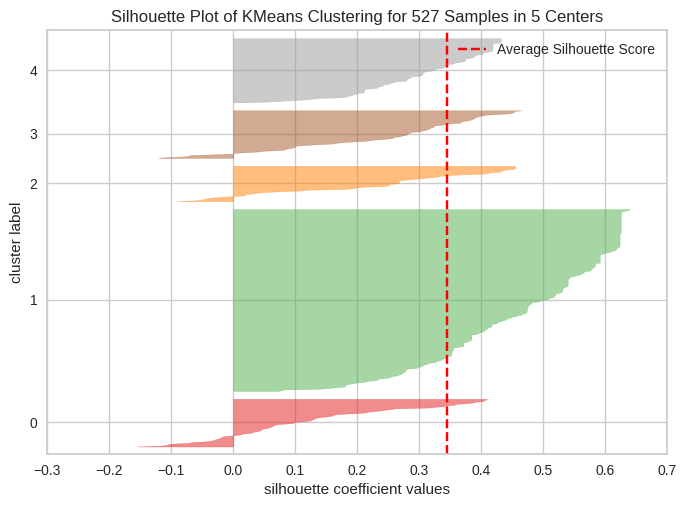

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 527 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [119]:
np. random. seed (42)
# Run k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_result = kmeans. fit (depression_scaled)
# Print the clustering result
print("Cluster Centers:")
print (kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result. labels_)

warnings.filterwarnings("ignore")
#from previous code is kmeans = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer (kmeans, color="yellowbrick" )
visualizer.fit(depression_scaled) # Fit the data to the visualizer
print("The average silhouette score is:", visualizer.silhouette_score_) # Print the average visualizer.show() # Finalize and render the figure
visualizer.show()

#### Clustering Visualisation (K=6)

With \( k = 6 \), the KMeans algorithm created six clusters, each with its own center. The average silhouette score is 0.388, indicating moderate separation between clusters. The silhouette plot shows that most clusters are well-defined, though some overlap remains. This clustering provides detailed segmentation, but further adjustments could improve cluster clarity.

Cluster Centers:
[[-3.45163153e-01 -1.89318457e-01  2.91679287e-01  1.88534207e+00
   4.01663716e-01 -6.66133815e-16]
 [-3.04978682e-01 -3.77344715e-01  2.45738719e-01 -4.55679716e-01
   5.83923729e-01  1.00000000e+00]
 [ 1.32712965e+00 -5.25224765e-02 -1.74621018e-01  5.87091143e-02
  -1.65914601e+00  2.00000000e+00]
 [-2.92955923e-01  1.89306911e+00  8.63229053e-02 -2.24645708e-02
   4.52696520e-01  3.00000000e+00]
 [-4.98402999e-01 -2.52812558e-01  3.38187170e-01 -2.75240995e-01
  -1.71255243e+00  9.42307692e-01]
 [ 1.91874306e+00 -2.11192231e-01 -2.10146356e+00  2.14586474e-01
  -9.63701508e-01  2.02173913e+00]]

Cluster Labels:
[3 4 5 1 1 0 2 3 1 4 1 1 5 1 1 1 0 2 0 3 4 5 0 0 2 1 1 5 3 2 4 0 1 2 3 1 1
 5 1 1 5 1 2 0 0 1 4 0 3 1 1 1 0 1 3 5 3 1 4 0 5 1 5 5 3 1 1 1 1 3 5 0 2 3
 4 1 0 0 5 1 1 1 1 1 5 5 3 4 5 5 1 2 3 3 3 1 1 4 1 0 1 4 1 1 5 1 3 2 3 2 4
 1 0 3 4 3 1 1 1 2 1 1 0 0 3 0 5 5 3 1 1 1 2 1 1 3 1 2 3 2 1 2 1 1 2 4 0 1
 0 2 1 3 1 1 4 3 5 1 0 1 4 1 3 2 0 5 3 5 4 1 1 1 5 1 3 0 5 

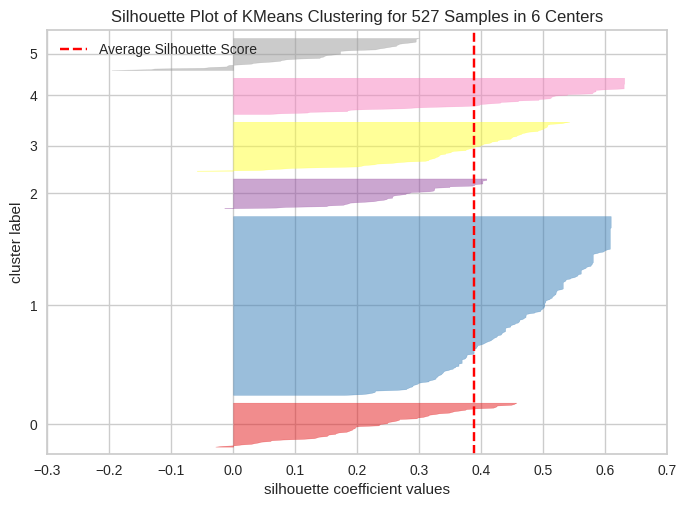

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 527 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [130]:
np. random. seed (42)
# Run k-means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_result = kmeans. fit (depression_scaled)
# Print the clustering result
print("Cluster Centers:")
print (kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print (kmeans_result. labels_)

warnings.filterwarnings("ignore")
#from previous code is kmeans = KMeans(n_clusters=6, random_state=42)
visualizer = SilhouetteVisualizer (kmeans, color="yellowbrick" )
 # Fit the data to the visualizer
visualizer.fit(depression_scaled)
# Print the average visualizer.show() # Finalize and render the figure
print("The average silhouette score is:", visualizer.silhouette_score_)
visualizer.show()

### Clustering center Visualisation

These scatter plots show the clustering results for \( k = 4 \), \( k = 5 \), and \( k = 6 \) using KMeans. Each point represents a data sample, with colors indicating cluster membership. The x-axis (total_assets) and y-axis (no_lasting_investment) are the features used for visualization. As \( k \) increases, the data points are divided into more distinct clusters, revealing finer groupings within the data. The choice of \( k \) affects how granularly the data is segmented, with higher \( k \) values providing more detailed clustering.

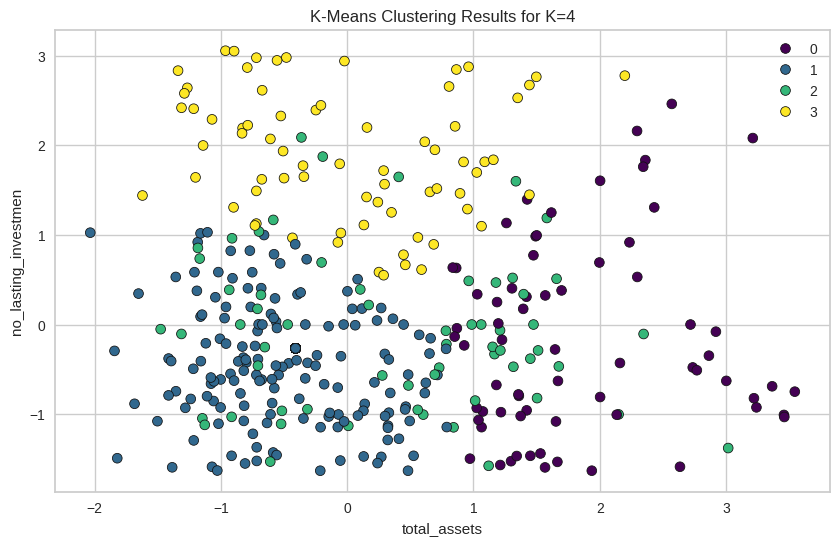

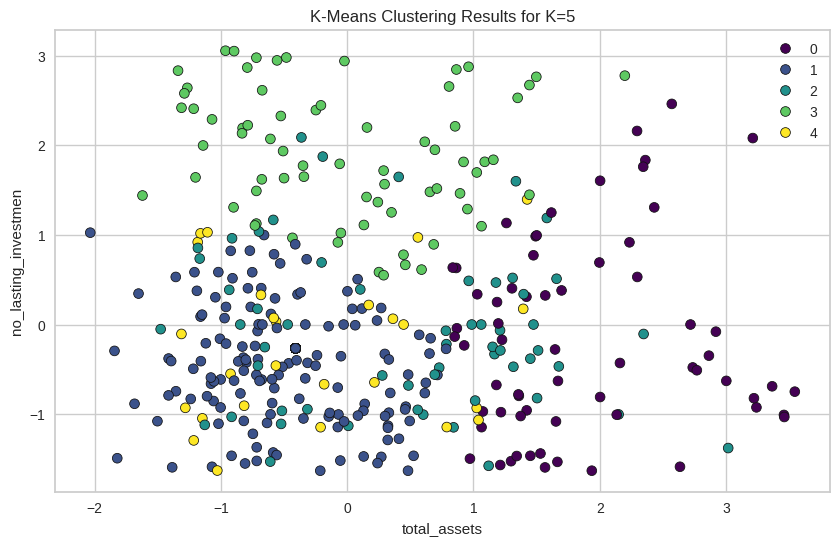

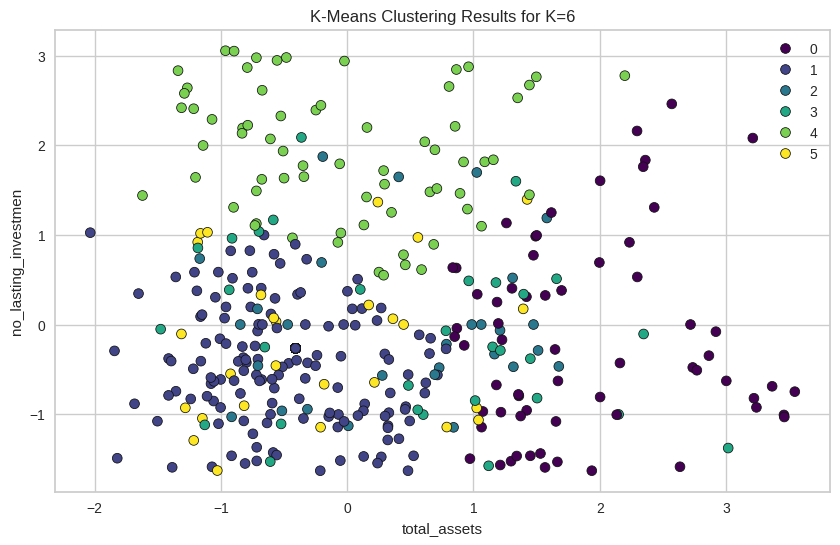

In [131]:
# Values of K to test
k_values = [4, 5, 6]

for k in k_values:
    # Run K-means clustering with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(depression_scaled)

    # Add cluster labels to the DataFrame
    depression_scaled['Cluster'] = kmeans_result.labels_

    # Visualize clustering using a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=depression_scaled.columns[3],
        y=depression_scaled.columns[1],
        hue='Cluster',
        data=depression_scaled,
        palette='viridis',
        edgecolor='k'
    )
    plt.title(f'K-Means Clustering Results for K={k}')
    plt.xlabel(depression_scaled.columns[3])
    plt.ylabel(depression_scaled.columns[1])
    plt.legend()
    plt.show()

###K-means clustering with estimating K and initiailizations


- **Calinski-Harabasz Score**: This score peaks at **\( k = 4 \) and \( k = 5 \)**, suggesting these values provide compact and well-separated clusters, with \( k = 4 \) having a slight advantage.

- **Silhouette Score**: The Silhouette score peaks at **\( k = 6 \)**, indicating that six clusters may offer the best-defined separation and cohesion for the data.

In summary, while **\( k = 4 \) and \( k = 5 \)** are strong choices based on the Calinski-Harabasz score, the **Silhouette score suggests \( k = 6 \)** as the optimal number of clusters for achieving the best-defined segmentation of the data.



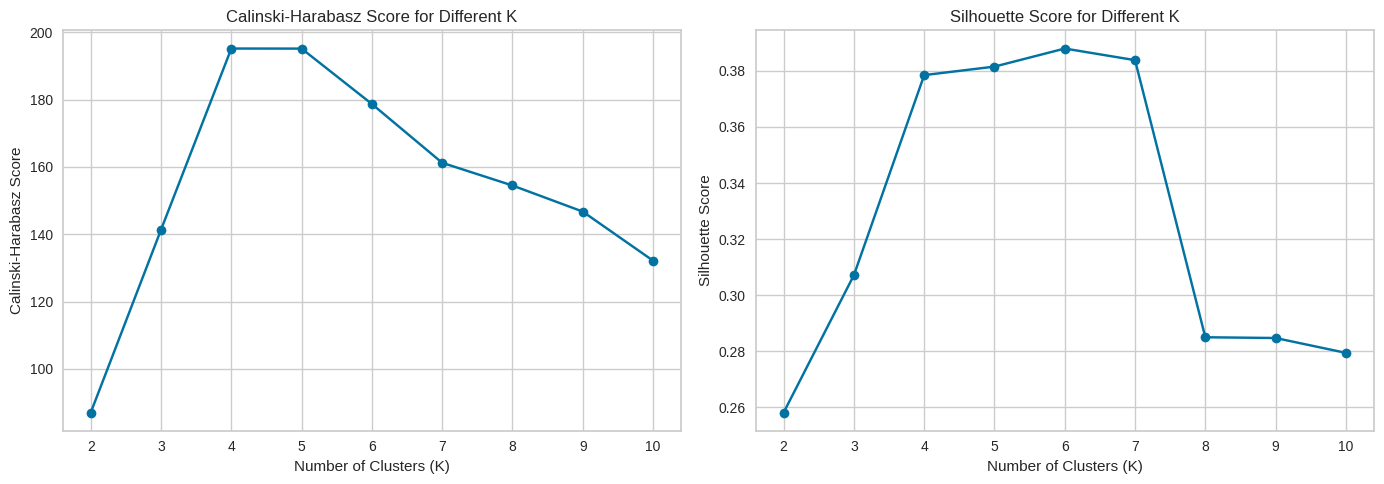

In [122]:
# Range of clusters to try
k_range = range(2, 11)

# Lists to store scores
ch_scores = []
silhouette_scores = []

# Calculate scores for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(depression_scaled)
    ch_score = calinski_harabasz_score(depression_scaled, kmeans.labels_)
    silhouette_avg = silhouette_score(depression_scaled, kmeans.labels_)
    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

# Plot the scores for comparison
plt.figure(figsize=(14, 5))

# Plot Calinski-Harabasz Score
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Clustring validation:

#### Silhouette coefficient

The silhouette score was used here to measures how similar data points are within a cluster compared to other clusters. Higher scores indicate better-defined clusters. Here, KMeans is run for K values from 2 to 10, and the silhouette score for each value of K is stored and printed.

In [123]:
# Define the range of K values to test
K_range = range(2, 11)

# Dictionary to store results
silhouette_scores = {}
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    clusters = kmeans.fit_predict(depression_scaled)  # This gives the labels directly
    score = silhouette_score(depression_scaled, clusters)  # Pass clusters directly
    silhouette_scores[K] = score
    print(f"Silhouette Score for K={K}: {score:.2f}")

Silhouette Score for K=2: 0.26
Silhouette Score for K=3: 0.31
Silhouette Score for K=4: 0.38
Silhouette Score for K=5: 0.38
Silhouette Score for K=6: 0.39
Silhouette Score for K=7: 0.38
Silhouette Score for K=8: 0.28
Silhouette Score for K=9: 0.28
Silhouette Score for K=10: 0.28


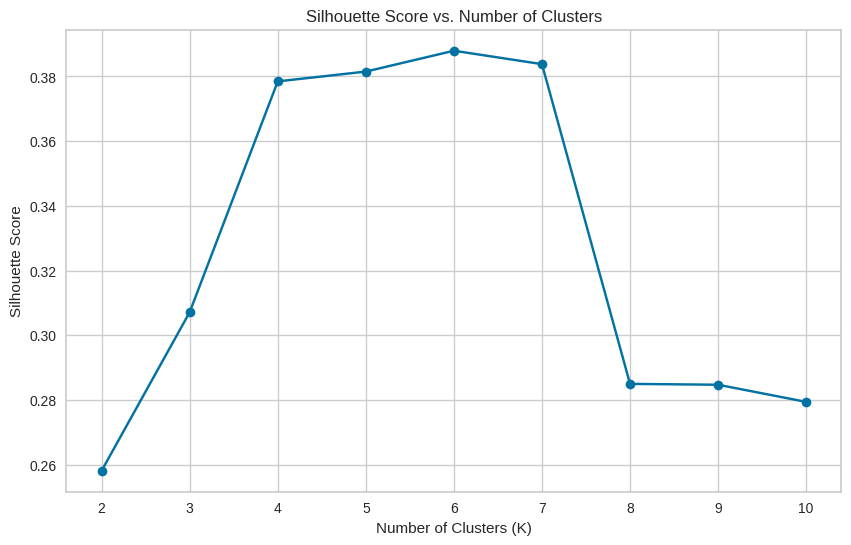

In [124]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

####Elbow method

This code uses the Elbow Method to find the optimal number of clusters by calculating and plotting the WSS (Within-Cluster Sum of Squares) for different K values. The "elbow" point in the plot suggests the ideal K.


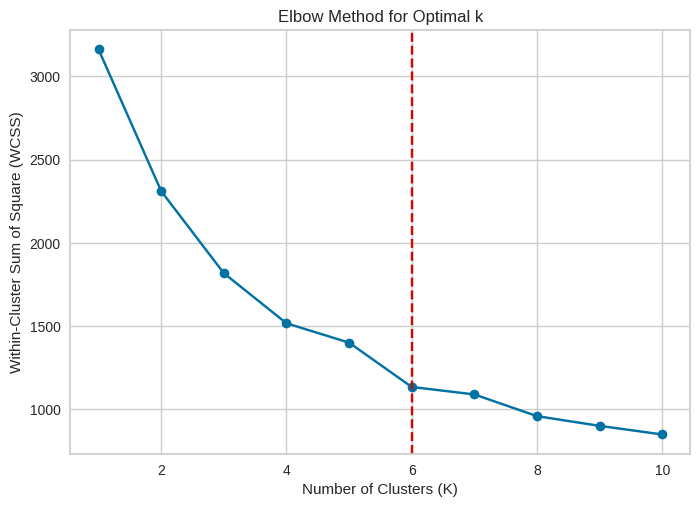

In [134]:
wss_values = []
K_values = range(1, 11)
for k in K_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k))
    kmeans.fit(depression_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(K_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.title('Elbow Method for Optimal k')

optimal_k = 6
plt.axvline(x=optimal_k, color='r', linestyle='--')

plt.legend()
plt.show()

### Analysis and Justification:



**Silhouette Score Analysis:** The Silhouette Score, which evaluates how well-separated and cohesive each cluster is, reached its highest value with  six clusters (k=6), suggesting that six clusters provide the best-defined grouping in terms of separation and cohesion.

**Calinski-Harabasz Score Analysis:** The Calinski-Harabasz Score, which measures cluster compactness and separation, peaked at four and five clusters (k=4) and (k=5), showing they form well-defined groups. Six clusters also had a high score (k=6), indicating it provides similarly good compactness and separation.

**Elbow Method Analysis:** The elbow plot showed a noticeable bend around six clusters (k=6). This suggests that beyond six clusters, the improvements in clustering quality diminish, making six clusters a practical choice for balancing compactness and separation.

---

**Conclusion:** While four (k=4) and five (k=5) clusters are supported by the Calinski-Harabasz Score for achieving compact clustering, six (k=6) clusters stand out as an effective option due to the highest Silhouette Score and strong Calinski-Harabasz Score. Both the Silhouette Score and Elbow Method support six clusters, making it the recommended choice for balancing well-defined clusters with added detail. However, four and five clusters remain viable if a simpler, more compact grouping is preferred.